In [18]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pyxel
import xarray as xr

In [19]:
pyxel.__version__

'2.6.1'

In [20]:
cfg = pyxel.load("../config/simstar.yaml")

detector = cfg.detector

In [21]:
result = pyxel.run_mode(mode=cfg.exposure, detector=detector, pipeline=cfg.pipeline)

result

<xarray.DataTree>
Group: /
│   Dimensions:  (y: 500, x: 500, time: 1)
│   Coordinates:
│     * y        (y) int64 4kB 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
│     * x        (x) int64 4kB 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
│     * time     (time) float64 8B 6e+03
│   Data variables:
│       photon   (time, y, x) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       charge   (time, y, x) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       pixel    (time, y, x) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       signal   (time, y, x) float64 2MB 7.179e-05 -4.967e-05 ... -1.414e-05
│       image    (time, y, x) uint16 500kB 0 0 0 2 0 0 5 1 0 0 ... 0 3 0 0 1 1 0 1 0
│   Attributes:
│       pyxel version:  2.6.1
│       running mode:   Exposure
├── Group: /scene
│   └── Group: /scene/list
│       └── Group: /scene/list/0
│               Dimensions:     (ref: 345, wavelength: 343)
│               Coordinates:
│                 * ref         (ref) int64 3kB 0 1 2 3 4 5 6 7 ... 338 339 340 341 342 343 344
│                 * wavelength  (wavelength) float64 3kB 336.0 338.0 ... 1.018e+03 1.02e+03
│               Data variables:
│                   x           (ref) float64 3kB 2.057e+05 2.058e+05 ... 2.031e+05 2.03e+05
│                   y           (ref) float64 3kB 8.575e+04 8.58e+04 ... 8.795e+04 8.807e+04
│                   weight      (ref) float64 3kB 11.49 14.13 15.22 14.56 ... 15.21 11.51 8.727
│                   flux        (ref, wavelength) float64 947kB 0.03769 0.04137 ... 1.813 1.896
│               Attributes:
│                   right_ascension:  56.75 deg
│                   declination:      24.1167 deg
│                   fov_radius:       0.5 deg
└── Group: /data

In [22]:
result.scene
data_tree = detector.scene.data

data_tree["/list/0"]


<xarray.DataTree '0'>
Group: /list/0
    Dimensions:     (ref: 345, wavelength: 343)
    Coordinates:
      * ref         (ref) int64 3kB 0 1 2 3 4 5 6 7 ... 338 339 340 341 342 343 344
      * wavelength  (wavelength) float64 3kB 336.0 338.0 ... 1.018e+03 1.02e+03
    Data variables:
        x           (ref) float64 3kB 2.057e+05 2.058e+05 ... 2.031e+05 2.03e+05
        y           (ref) float64 3kB 8.575e+04 8.58e+04 ... 8.795e+04 8.807e+04
        weight      (ref) float64 3kB 11.49 14.13 15.22 14.56 ... 15.21 11.51 8.727
        flux        (ref, wavelength) float64 947kB 0.03769 0.04137 ... 1.813 1.896
    Attributes:
        right_ascension:  56.75 deg
        declination:      24.1167 deg
        fov_radius:       0.5 deg

In [12]:
data_tree = detector.scene.data

data_tree["/list/0"]
ds = data_tree["/list/0"].to_dataset()

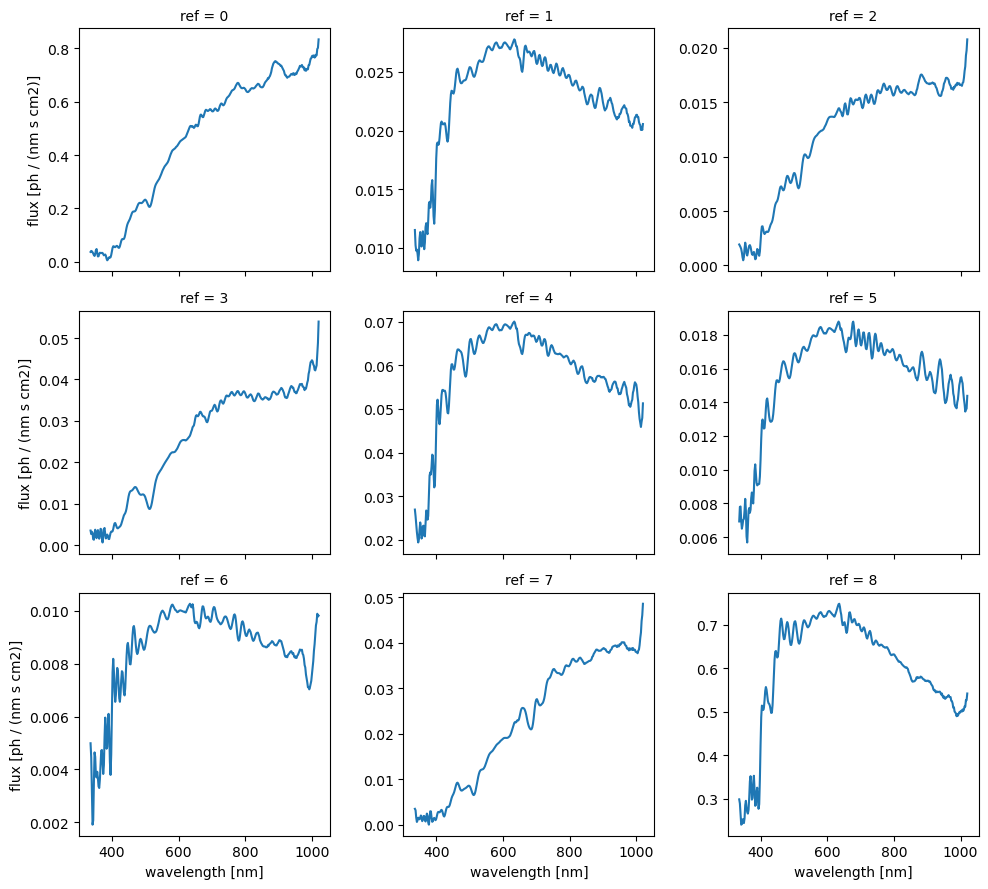

In [23]:
ds["flux"].isel(ref=slice(None, 9)).plot.line(col="ref", sharey=False, col_wrap=3)

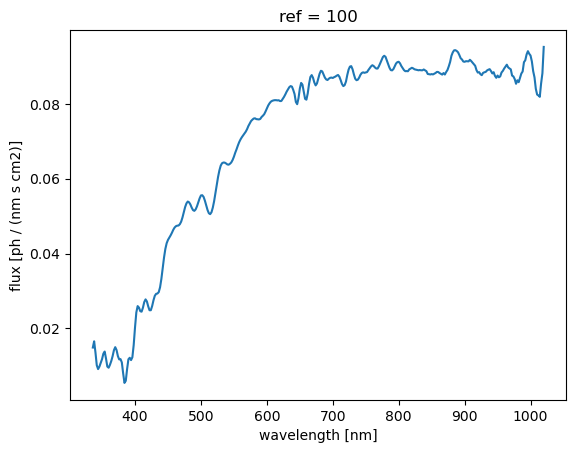

In [24]:
ds["flux"].isel(ref=100).plot.line()

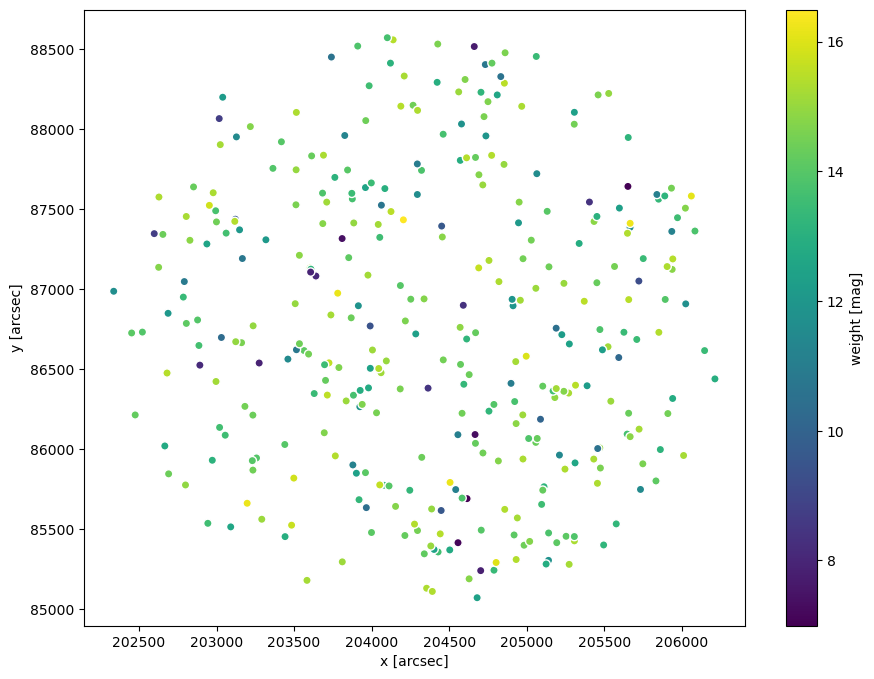

In [25]:
ds.plot.scatter(x="x", y="y", hue="weight", marker="o", size=8)

In [26]:
pyxel.display_detector(detector)

ModuleNotFoundError: No module named 'jupyter_bokeh'

Tabs(dynamic=True)
    [0] Interactive(XArrayInteractive, name='Array')
    [1] Interactive(XArrayInteractive, name='Histogram')

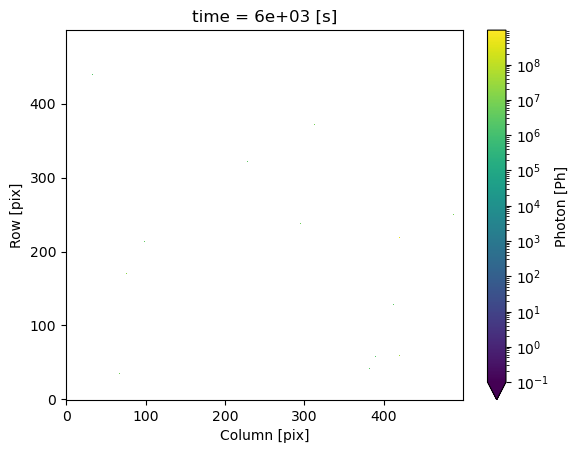

In [27]:
xr.DataArray(result.photon).plot(
    norm=colors.LogNorm(
        vmin=0.1,  # 1
        vmax=result.photon.max(),
    )
)

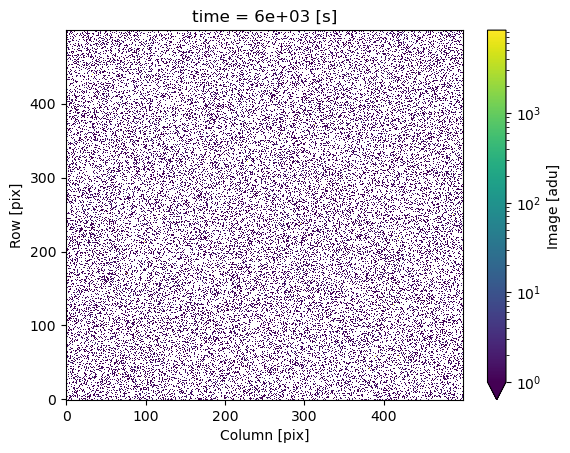

In [28]:
xr.DataArray(result.image).plot(
    norm=colors.LogNorm(
        vmin=1,  # 0.1
        vmax=result.image.max(),
    )
)